# CTAPIPE Tutorial

ctapipe is pre-release software and is subject to wild changes over the next few months (restructuring, etc). It is under active developement, but is only in the very preliminary prototyping stage.

## Setup:

### python 3.4 is required! If you don't have it, type:

```sh
conda create -n py3 python=3.4 anaconda
```

Then wait, and when it's done, type:

```
source activate py3
```

### next, install pyhessio via conda (for low-level data access)

```sh

conda install conda-build # if you don't have it already

git clone https://github.org/cta-observatory/pyhessio
conda build pyhessio
conda install --use-local pyhessio

```

### Next, fetch and install ctapipe in development mode:

```sh

% git clone https://github.org/cta-observatory/ctapipe
% cd ctapipe
% make init         # this will fetch the example data
% make develop


```

## Next, try running the test suite and a tool:

```sh
% make test
```

Run a demo tool:

```sh
% ctapipe-camdemo
```

![camdemo](./camdemo.png "camdemo")

if you don't get this animated window, or the tests fail, let me know

## Notes

### tools

* `ctapipe` is a framework for making *tools* (which are by default command-line tools)
* there is a prelminary command-line option handling system (based on argparse) that can write all parameters used to a FITS header, for future re-use
* tools are just scripts in the `ctapipe/tools/` directory, and their main funcion needs to be declared in `setup.py`
* they get automatically installed in your path

try:

```sh
% ctapipe-info
```

In [2]:
%%sh
ctapipe-info

usage: ctapipe-info [-h] [--version] [--tools] [--dependencies]

Print various info to the console.

optional arguments:
  -h, --help      show this help message and exit
  --version       Print version number (default: False)
  --tools         Print available command line tools (default: False)
  --dependencies  Print available versions of dependencies (default: False)


In [3]:
%%sh
ctapipe-info --version
ctapipe-info --dependencies
ctapipe-info --tools


*** ctapipe version info ***

version: 0.0.dev337
release: False
githash: 952c3204bdc44818b939f1c02ea723ee7341a001


*** ctapipe dependencies ***

               Numpy -- 1.10.1
               Scipy -- 0.16.0
          Matplotlib -- 1.4.3
             Astropy -- 1.0.6
        scikit-learn -- 0.16.1

*** ctapipe tools ***

the following can be executed by typing ctapipe-<toolname>:

ctapipe-camdemo                 -  Example tool, displaying fake events in a
                                   camera.

ctapipe-dump-triggers           -  dump a FITS table ofthe event times and
                                   trigger patterns from a simtelarray input
                                   file.

ctapipe-info                    -  print information about ctapipe and its
                                   command-line tools.




So there are so far not a lot of tools... the API is more interesting to start with. 

**NOTE**: however that this is pre-alpha, very rough software, so not much is implemented. It's in the prototyping phase, and things will change rapidly.

### See what the package provides so far...

go to the documentation at:

https://cta-observatory.github.io/ctapipe/

## Let's explore some fake data...

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # get rid of some annoyances in latest matplotlib

import matplotlib.pyplot as plt
import numpy as np

from ctapipe.io import CameraGeometry
from ctapipe.visualization import CameraDisplay

first let's load up a blank image.  Rememeber that *images* in Cherenkov Cameras are generalized: they must be represented as 2 things, a `CameraGeometry` and *Data* (an array of pixel values)

We'll start with the HESS geometry, since it's the only one included so far that doesn't need to be extracted from a real data file

In [5]:
geom = CameraGeometry.from_name("HESS",1)  

In [6]:
geom.pix_x

<Quantity [-0.30449998,-0.26249999,-0.22049999,-0.17849998,-0.32549998,
           -0.28349999,-0.24149999,-0.19949998,-0.30449998,-0.26249999,
           -0.22049999,-0.17849998,-0.32549998,-0.28349999,-0.24149999,
           -0.19949998,-0.13649999,-0.09449998,-0.05249999,-0.01049998,
           -0.15749998,-0.11549999,-0.07349999,-0.03149998,-0.13649999,
           -0.09449998,-0.05249999,-0.01049998,-0.15749998,-0.11549999,
           -0.07349999,-0.03149998, 0.03150001, 0.07350001, 0.11550001,
            0.15750001, 0.01050001, 0.05250001, 0.09450001, 0.13650002,
            0.03150001, 0.07350001, 0.11550001, 0.15750001, 0.01050001,
            0.05250001, 0.09450001, 0.13650002, 0.19950001, 0.24150002,
            0.28350002, 0.32550001, 0.17850001, 0.22050001, 0.26250002,
            0.30450001, 0.19950001, 0.24150002, 0.28350002, 0.32550001,
            0.17850001, 0.22050001, 0.26250002, 0.30450001, 0.36750001,
            0.4095    , 0.4515    , 0.49349999, 0.34650001, 0.38

In [7]:
geom.pix_area

<Quantity [ 0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014915,
            0.0014915, 0.0014915, 0.0014915, 0.0014915, 0.0014

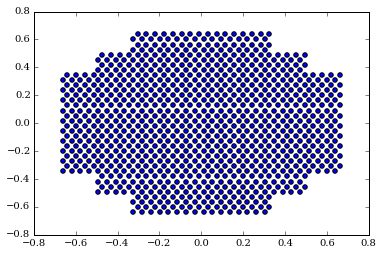

In [8]:
plt.scatter(geom.pix_x, geom.pix_y)

nice, but we can do better via the visualization module:

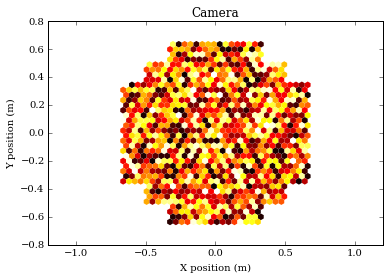

In [9]:
image = np.random.uniform(size=len(geom.pix_id))
disp = CameraDisplay(geom, image=image)

In [10]:
# better fake data:
%matplotlib inline
from ctapipe.reco import generate_2d_shower_model, make_mock_shower_image

showermodel = generate_2d_shower_model(centroid=(0.2, 0.05),length=0.005, width=0.1,psi='40d')

print(showermodel)
print(showermodel.pdf)

<bound method multivariate_normal_frozen.pdf of <scipy.stats._multivariate.multivariate_normal_frozen object at 0x1085f6160>>


In [11]:
im, sig, bg = make_mock_shower_image(geom, showermodel.pdf,intensity=10,nsb_level_pe=100)

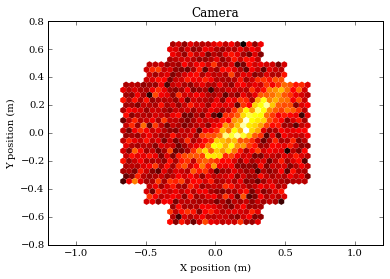

In [12]:
disp = CameraDisplay(geom, image=im)

## Interactive data analysis

CameraDisplays are pretty interactive, which doesn't work in notebook mode (so we will continue in windowed mode)

We will write a script to
* generate a fake calibrated shower image
* apply image cleaning
* calculate hillas parameters

In [13]:
# switch back to window (no more plots in the notebook)
%matplotlib

Using matplotlib backend: TkAgg


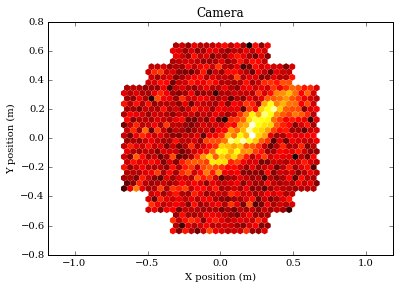

In [14]:
disp = CameraDisplay(geom)
disp.image = im

look for the popup window! It may be behind your browser...

Try using the pan and zoom tools

In [15]:
disp.enable_pixel_picker()

In [16]:
# change the image
image[20:50] = 1.0
image[400:450] = 0.5
disp.image = image

TclError: this isn't a Tk application

In [58]:
# change the normalization or limits:
disp.norm = 'log' # or lin, or any matplotlib.colors.Normalization

In [59]:
disp.norm = 'lin'

In [60]:
disp.add_colorbar()

In [61]:
# change the colorbar and limits

disp.cmap = 'jet'  # try others (see below)

gnuplot, Set1, gnuplot2_r, Blues, Set2, gist_ncar_r, gist_ncar, BrBG, Paired, BuPu, RdGy, gist_earth_r, Spectral, gist_stern_r, YlGn_r, autumn, Greys, gist_gray_r, winter, flag, Paired_r, ocean, PuBuGn, rainbow_r, hsv_r, hot, YlGnBu_r, Blues_r, spring, Oranges, bone_r, prism_r, BuPu_r, pink, hot_r, coolwarm, gist_earth, OrRd, Purples_r, gist_yarg_r, YlOrRd_r, Accent, gist_rainbow, PRGn_r, cool_r, PRGn, flag_r, PuOr, winter_r, summer_r, brg, gray_r, afmhot_r, jet_r, cubehelix, PuRd, YlOrBr, Spectral_r, gist_stern, BrBG_r, PuRd_r, YlGn, RdYlBu_r, RdYlGn_r, autumn_r, YlGnBu, afmhot, RdPu, binary, bone, RdYlGn, nipy_spectral_r, spring_r, Set3, coolwarm_r, terrain_r, spectral, gist_yarg, RdYlBu, RdGy_r, PiYG_r, gist_heat, Pastel1, PuOr_r, PuBu, jet, gist_rainbow_r, rainbow, pink_r, Purples, nipy_spectral, Accent_r, Wistia_r, Pastel2_r, copper, bwr, seismic, Greens_r, summer, cool, YlOrRd, CMRmap_r, Dark2_r, Wistia, seismic_r, RdBu, gist_heat_r, Pastel1_r, binary_r, GnBu_r, PiYG, spectral_r, GnBu, RdPu_r, YlOrBr_r, PuBu_r, PuBuGn_r, Dark2, prism, BuGn, RdBu_r, gist_gray, ocean_r, BuGn_r, gnuplot2, Set3_r, copper_r, OrRd_r, Greens, Set2_r, gnuplot_r, Oranges_r, brg_r, cubehelix_r, Reds_r, Set1_r, gray, Reds, bwr_r, hsv, terrain, Pastel2, Greys_r, CMRmap

### Exercise: Calcualte Hillas Parameters (2D moments of the signal distribution):

* **step 1**: **Clean** the image (select only the pixels that have noise, since the noise will throw off the calculation)
 * note that tailcuts_clean defines its thresholds as a function of the pedestal variance (which here we do not know.  You can use a fixed value of 10 for this exercise)
* **step 2**: pass the signal pixels to the hillas_parameters routine
* **step 3**: overlay the ellipse with disp.overlay_moment_ellipse()



In [17]:
%matplotlib inline
from ctapipe.reco.cleaning import tailcuts_clean, dilate
from ctapipe.reco import hillas_parameters

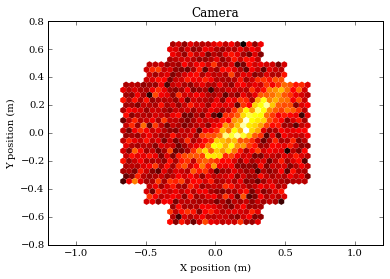

In [18]:
CameraDisplay(geom, image=im)

clean the image

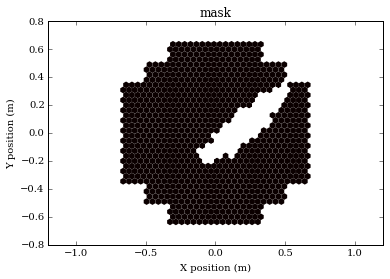

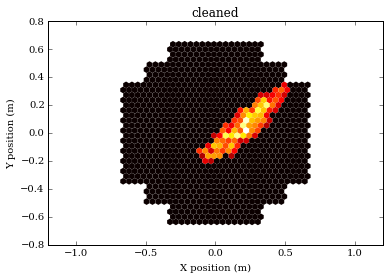

In [19]:
cleanmask = tailcuts_clean(geom, im, pedvars=10)
im_cleaned = im.copy()
im_cleaned[~cleanmask] = 0

plt.figure()
CameraDisplay(geom, image=cleanmask, title='mask')
plt.figure()
CameraDisplay(geom, image=im_cleaned, title='cleaned')

In [21]:
cleanmask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

now parameterize the image using `hillas_parameters`

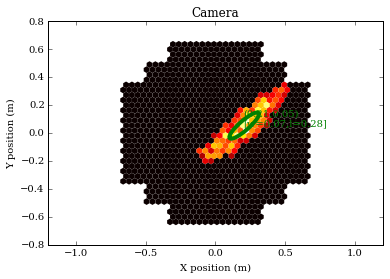

In [22]:
params = hillas_parameters(geom.pix_x[cleanmask], geom.pix_y[cleanmask], im[cleanmask])
params = hillas_parameters(geom.pix_x, geom.pix_y, im_cleaned)

disp = CameraDisplay(geom, image=im_cleaned)
disp.cmap='hot'
disp.overlay_moments(params, color='green', lw=4)

Next, Interactively see the effect of wider cleanings!
use the `dilate(geom, cleanmask)` function to "widen" the cleaning (each call widens it by one row of neighbor pixels), and redo your hillas parameterization (you can just insert this dilation  into your script above before you apply the clean mask to your image)

### Next, is to look at some real data! For that there is a separate notebook:

in the package you downloaded, look in:
`ctapipe/examples/notebooks/raw_data_exploration.ipynb`

(you can also view it non-interactively directly on github via:)